### K-means 클러스터링을 시도하여 SELLER 군집화 시도

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [11]:
# 샘플 데이터프레임 생성
df = pd.read_csv('./data_in/total_df.csv')

reviews = pd.read_csv('./data_in/reviews.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_26644\3384387085.py:2: DtypeWarning: Columns (16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data_in/total_df.csv')


In [12]:
df.columns

Index(['Order_id', 'Order_item_id', 'Product_id', 'Seller_id', 'Price',
       'Freight_value', 'Customer_id', 'Order_status',
       'Order_purchase_timestamp', 'Order_delivered_carrier_date',
       'Order_delivered_customer_date', 'Order_estimated_delivery_date',
       'Seller_zipcode_prefix', 'Seller_city', 'Seller_state',
       'Product_category_name', 'Product_weight_g', 'Product_length_cm',
       'Product_height_cm', 'Product_width_cm', 'Revenue',
       'Customer_unique_id', 'Customer_zipcode_prefix', 'Customer_city',
       'Customer_state', 'Payment_sequential', 'Payment_type',
       'Payment_installments', 'Payment_value', 'Review_id', 'Review_score',
       'Review_creation_date', 'Review_answer_timestamp'],
      dtype='object')

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87873 entries, 0 to 87872
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review_id                87873 non-null  object
 1   Order_id                 87873 non-null  object
 2   Review_score             87873 non-null  int64 
 3   Review_creation_date     87873 non-null  object
 4   Review_answer_timestamp  87873 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [14]:
df.columns

Index(['Order_id', 'Order_item_id', 'Product_id', 'Seller_id', 'Price',
       'Freight_value', 'Customer_id', 'Order_status',
       'Order_purchase_timestamp', 'Order_delivered_carrier_date',
       'Order_delivered_customer_date', 'Order_estimated_delivery_date',
       'Seller_zipcode_prefix', 'Seller_city', 'Seller_state',
       'Product_category_name', 'Product_weight_g', 'Product_length_cm',
       'Product_height_cm', 'Product_width_cm', 'Revenue',
       'Customer_unique_id', 'Customer_zipcode_prefix', 'Customer_city',
       'Customer_state', 'Payment_sequential', 'Payment_type',
       'Payment_installments', 'Payment_value', 'Review_id', 'Review_score',
       'Review_creation_date', 'Review_answer_timestamp'],
      dtype='object')

In [7]:
# 클러스터링에 사용할 특징 선택
features = ['Revenue', 'Payment_installments', 'Freight_value', 'Review_score']

In [16]:
# 범주형 데이터들 더미화

customer_dummy = pd.get_dummies(df['Customer_id'], prefix= 'customer')

city_dummy = pd.get_dummies(df['Customer_city'], prefix= 'city')

product_dummy = pd.get_dummies(df['Product_category_name'], prefix= 'category')

In [17]:
# 더미 데이터들을 인코딩

df_plus = pd.concat([df, customer_dummy, city_dummy, product_dummy], axis= 1)

In [32]:
# 원하는 컬럼만을 선택

column_filter = ['Product_id', 'Seller_id', 'Price',
       'Freight_value', 'Customer_id',
       'Product_category_name', 'Revenue',
       'Customer_city',
       'Payment_sequential', 'Payment_type','Payment_installments', 'Payment_value',
       'Review_score']

df_plus = df_plus[column_filter]

In [23]:
# 결측치 제거

# df_plus['Review_score'].fillna(0, inplace= True)

C:\Users\USER\AppData\Local\Temp\ipykernel_26644\655721524.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_plus['Review_score'].fillna(0, inplace= True)


In [36]:
# 특징 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_plus[features])

In [51]:
# k-means 클러스터링
n_clusters = 8  # 클러스터 개수 설정
kmeans = KMeans(n_clusters=n_clusters, random_state=50)
df_plus['cluster'] = kmeans.fit_predict(df_scaled)

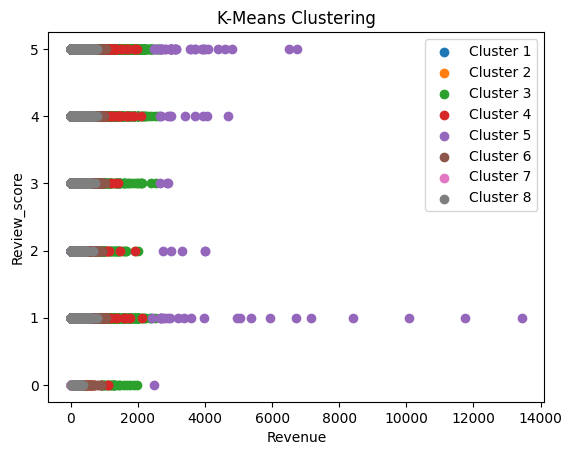

Cluster centers:
[[-0.28308387 -0.63255966 -0.29909611]
 [ 0.29118905  2.19079151  0.08863674]
 [ 5.02577125  1.44151151  1.35403442]
 [ 1.72363249  0.91373935  6.53776032]
 [17.19161915  0.95484792  3.78270622]
 [ 1.44059367 -0.23120173  0.10537041]
 [-0.17675896  0.42724831 -0.22946045]
 [ 0.14170677 -0.11811867  1.76072779]]


In [52]:
# 클러스터 시각화
for cluster in range(n_clusters):
    plt.scatter(df_plus[df_plus['cluster'] == cluster]['Revenue'],
                df_plus[df_plus['cluster'] == cluster]['Review_score'],
                label=f'Cluster {cluster + 1}')

plt.xlabel('Revenue')
plt.ylabel('Review_score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

# 클러스터 중심 출력
print("Cluster centers:")
print(kmeans.cluster_centers_)
